#  Importing  all libraries

In [3]:
# import required libraries for dataframe and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier








# Loading data

In [4]:
weather_data=pd.read_csv('weather.csv')
weather_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Feature Engineering

In [5]:
colums=['Date','Location','RISK_MM','RainTomorrow']
weather_data_mean_data=weather_data.drop(['Date','Location','RISK_MM','RainTomorrow'],axis=1)
weather_data_mean_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


### Convert categorical data into numerical data

In [6]:
wind1={'W':0,'SE':1,'E':2,'N':3,'SSE':4,'S':5,'WSW':6,'SW':7,'SSW':8,'WNW':9,'NW':10,'ENE':11,'ESE':12,'NE':13,'NNW':14,'NNE':15}
weather_data_mean_data['WindGustDir']=weather_data_mean_data['WindGustDir'].map(wind1)
weather_data_mean_data['WindGustDir']=pd.DataFrame(data=weather_data_mean_data,columns=['WindGustDir'])
weather_data_mean_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,0.0,NaN,NaN,9.0,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,0.0,NaN,NaN,6.0,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,0.0,NaN,NaN,13.0,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,1.0,NaN,NaN,0.0,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [7]:
wind1={'W':0,'SE':1,'E':2,'N':3,'SSE':4,'S':5,'WSW':6,'SW':7,'SSW':8,'WNW':9,'NW':10,'ENE':11,'ESE':12,'NE':13,'NNW':14,'NNE':15}
weather_data_mean_data['WindDir9am']=weather_data_mean_data['WindDir9am'].map(wind1)
weather_data_mean_data['WindDir9am']=pd.DataFrame(data=weather_data_mean_data,columns=['WindDir9am'])
weather_data_mean_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,0.0,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,0.0,NaN,NaN,9.0,44.0,14.0,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,0.0,NaN,NaN,6.0,46.0,0.0,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,0.0,NaN,NaN,13.0,24.0,1.0,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,1.0,NaN,NaN,0.0,41.0,11.0,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [8]:
wind1={'W':0,'SE':1,'E':2,'N':3,'SSE':4,'S':5,'WSW':6,'SW':7,'SSW':8,'WNW':9,'NW':10,'ENE':11,'ESE':12,'NE':13,'NNW':14,'NNE':15}
weather_data_mean_data['WindDir3pm']=weather_data_mean_data['WindDir3pm'].map(wind1)
weather_data_mean_data['WindDir3pm']=pd.DataFrame(data=weather_data_mean_data,columns=['WindDir3pm'])
weather_data_mean_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,0.0,9.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,0.0,NaN,NaN,9.0,44.0,14.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,0.0,NaN,NaN,6.0,46.0,0.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,0.0,NaN,NaN,13.0,24.0,1.0,2.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,1.0,NaN,NaN,0.0,41.0,11.0,10.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [9]:
weather_data_mean_data['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [10]:

r1={'Yes':1 , 'No':0}
weather_data_mean_data['RainToday']=weather_data_mean_data['RainToday'].map(r1)
weather_data_mean_data['RainToday']=pd.DataFrame(data=weather_data_mean_data,columns=['RainToday'])
weather_data_mean_data.head(5)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,0.0,9.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,9.0,44.0,14.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,6.0,46.0,0.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,13.0,24.0,1.0,2.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,17.5,32.3,1.0,NaN,NaN,0.0,41.0,11.0,10.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0


### Checking null values

In [11]:
weather_data_mean_data.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

In [12]:
cols=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']

In [13]:
weather_data_mean_data[cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,0.0,9.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,9.0,44.0,14.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,6.0,46.0,0.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,13.0,24.0,1.0,2.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,17.5,32.3,1.0,NaN,NaN,0.0,41.0,11.0,10.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0


### Handling missing values

In [14]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
weather_data_new=imp_mean.fit_transform(weather_data_mean_data[cols])
weather_data_new=pd.DataFrame(data=weather_data_new,columns=cols)


In [15]:
weather_data_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.469824,7.624853,0.0,44.0,0.0,9.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,7.4,25.1,0.0,5.469824,7.624853,9.0,44.0,14.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0
2,12.9,25.7,0.0,5.469824,7.624853,6.0,46.0,0.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,5.469824,7.624853,13.0,24.0,1.0,2.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0
4,17.5,32.3,1.0,5.469824,7.624853,0.0,41.0,11.0,10.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [16]:
weather_data_new.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [17]:
import datetime as dt
date=weather_data['Date']
date=pd.DataFrame(data=date,columns=['Date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    142193 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


### Label encoding for convering into numerical data


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder_X=LabelEncoder()
label_encoded_data=label_encoder_X.fit_transform(weather_data['Location'])
label_encoded_data=pd.DataFrame(data=label_encoded_data,columns=['Location'])
label_encoded_data.head(200)

,Location
0,2
1,2
2,2
3,2
4,2
...,...
195,2
196,2
197,2
198,2


In [19]:
label_encoded_data.head(200)

,Location
0,2
1,2
2,2
3,2
4,2
...,...
195,2
196,2
197,2
198,2


In [20]:
label_encoded_data['Location'].value_counts()

9     3418
37    3337
31    3193
13    3192
15    3188
7     3161
0     3090
6     3034
39    3033
3     3031
22    3030
5     3028
17    3028
1     3016
2     3011
32    3009
19    3009
20    3007
38    3005
28    3002
35    3000
44    2999
40    2998
33    2996
48    2990
8     2988
10    2988
47    2983
14    2980
42    2976
27    2964
30    2964
24    2955
36    2955
11    2953
46    2952
34    2951
12    2943
26    2929
4     2928
23    2907
21    2854
43    2819
29    2762
45    2553
18    2435
25    1569
16    1559
41    1521
Name: Location, dtype: int64

In [21]:
date.head()

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05


In [22]:
date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    142193 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [23]:
date['Date']=pd.to_datetime(date['Date'])
date['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
142188   2017-06-20
142189   2017-06-21
142190   2017-06-22
142191   2017-06-23
142192   2017-06-24
Name: Date, Length: 142193, dtype: datetime64[ns]

In [24]:
date['year']=date['Date'].dt.year
date['month']=date['Date'].dt.month
date['day']=date['Date'].dt.day
date


,Date,year,month,day
0,2008-12-01,2008,12,1
1,2008-12-02,2008,12,2
2,2008-12-03,2008,12,3
3,2008-12-04,2008,12,4
4,2008-12-05,2008,12,5
...,...,...,...,...
142188,2017-06-20,2017,6,20
142189,2017-06-21,2017,6,21
142190,2017-06-22,2017,6,22
142191,2017-06-23,2017,6,23


In [25]:
date=date.drop(['Date'],axis=1)
date

,year,month,day
0,2008,12,1
1,2008,12,2
2,2008,12,3
3,2008,12,4
4,2008,12,5
...,...,...,...
142188,2017,6,20
142189,2017,6,21
142190,2017,6,22
142191,2017,6,23


In [26]:

new=pd.concat([label_encoded_data,date],axis=1)


In [27]:
new.head()

,Location,year,month,day
0,2,2008,12,1
1,2,2008,12,2
2,2,2008,12,3
3,2,2008,12,4
4,2,2008,12,5


In [28]:
risk=weather_data['RISK_MM']
risk=pd.DataFrame(data=risk,columns=['RISK_MM'])
risk.head()

,RISK_MM
0,0.0
1,0.0
2,0.0
3,1.0
4,0.2


In [29]:
new1=pd.concat([new,risk],axis=1)


In [30]:
new1.head()

,Location,year,month,day,RISK_MM
0,2,2008,12,1,0.0
1,2,2008,12,2,0.0
2,2,2008,12,3,0.0
3,2,2008,12,4,1.0
4,2,2008,12,5,0.2


In [31]:
wether_data_real=pd.concat([new1,weather_data_new],axis=1)

In [32]:
wether_data_real.head()

,Location,year,month,day,RISK_MM,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,2008,12,1,0.0,13.4,22.9,0.6,5.469824,7.624853,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2,2008,12,2,0.0,7.4,25.1,0.0,5.469824,7.624853,...,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0
2,2,2008,12,3,0.0,12.9,25.7,0.0,5.469824,7.624853,...,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0
3,2,2008,12,4,1.0,9.2,28.0,0.0,5.469824,7.624853,...,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0
4,2,2008,12,5,0.2,17.5,32.3,1.0,5.469824,7.624853,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [33]:
x=wether_data_real

In [34]:
x.head()

,Location,year,month,day,RISK_MM,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,2008,12,1,0.0,13.4,22.9,0.6,5.469824,7.624853,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2,2008,12,2,0.0,7.4,25.1,0.0,5.469824,7.624853,...,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0
2,2,2008,12,3,0.0,12.9,25.7,0.0,5.469824,7.624853,...,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0
3,2,2008,12,4,1.0,9.2,28.0,0.0,5.469824,7.624853,...,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0
4,2,2008,12,5,0.2,17.5,32.3,1.0,5.469824,7.624853,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [35]:
r2={'Yes':1 , 'No' : 0}
rain_tomorrow=weather_data['RainTomorrow'].map(r2)
rain_tomorrow=pd.DataFrame(data=rain_tomorrow,columns=['RainTomorrow'])


In [36]:
rain_tomorrow.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


In [37]:
weather_plus_output=pd.concat([wether_data_real,rain_tomorrow],axis=1)

In [38]:
weather_plus_output.head()

,Location,year,month,day,RISK_MM,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,2008,12,1,0.0,13.4,22.9,0.6,5.469824,7.624853,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0
1,2,2008,12,2,0.0,7.4,25.1,0.0,5.469824,7.624853,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0
2,2,2008,12,3,0.0,12.9,25.7,0.0,5.469824,7.624853,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0
3,2,2008,12,4,1.0,9.2,28.0,0.0,5.469824,7.624853,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0
4,2,2008,12,5,0.2,17.5,32.3,1.0,5.469824,7.624853,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0


In [39]:
y=rain_tomorrow

In [40]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   RainTomorrow  142193 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [41]:
y.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


# Data Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
x=pd.DataFrame( MinMaxScaler().fit(x).transform(x))

In [43]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.041667,0.1,1.0,0.000000,0.000000,0.516509,0.523629,0.001617,0.037723,0.525852,...,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0
1,0.041667,0.1,1.0,0.033333,0.000000,0.375000,0.565217,0.000000,0.037723,0.525852,...,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0
2,0.041667,0.1,1.0,0.066667,0.000000,0.504717,0.576560,0.000000,0.037723,0.525852,...,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0
3,0.041667,0.1,1.0,0.100000,0.002695,0.417453,0.620038,0.000000,0.037723,0.525852,...,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0
4,0.041667,0.1,1.0,0.133333,0.000539,0.613208,0.701323,0.002695,0.037723,0.525852,...,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       142193 non-null  float64
 1   1       142193 non-null  float64
 2   2       142193 non-null  float64
 3   3       142193 non-null  float64
 4   4       142193 non-null  float64
 5   5       142193 non-null  float64
 6   6       142193 non-null  float64
 7   7       142193 non-null  float64
 8   8       142193 non-null  float64
 9   9       142193 non-null  float64
 10  10      142193 non-null  float64
 11  11      142193 non-null  float64
 12  12      142193 non-null  float64
 13  13      142193 non-null  float64
 14  14      142193 non-null  float64
 15  15      142193 non-null  float64
 16  16      142193 non-null  float64
 17  17      142193 non-null  float64
 18  18      142193 non-null  float64
 19  19      142193 non-null  float64
 20  20      142193 non-null  float64
 21  21      14

## Feature Selection

In [45]:
col=['Location','year','month','day','RISK_MM','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']

In [46]:
MODEL=ExtraTreesClassifier()

In [47]:
MODEL.fit(x,y)

<ipython-input-47-25aef067627c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  MODEL.fit(x,y)


ExtraTreesClassifier()

In [48]:
imp=pd.Series(MODEL.feature_importances_,index=col)
imp

Location         0.013886
year             0.013151
month            0.013575
day              0.013353
RISK_MM          0.425385
MinTemp          0.015622
MaxTemp          0.016011
Rainfall         0.016362
Evaporation      0.010962
Sunshine         0.038928
WindGustDir      0.013318
WindGustSpeed    0.027624
WindDir9am       0.013846
WindDir3pm       0.013947
WindSpeed9am     0.013657
WindSpeed3pm     0.014598
Humidity9am      0.025939
Humidity3pm      0.107574
Pressure9am      0.023901
Pressure3pm      0.026086
Cloud9am         0.019496
Cloud3pm         0.032389
Temp9am          0.014686
Temp3pm          0.017074
RainToday        0.058628
dtype: float64

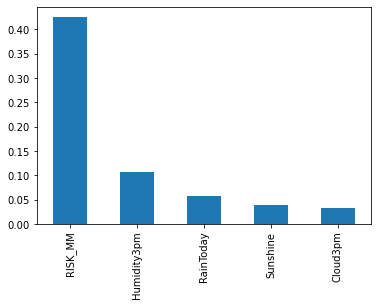

In [49]:
imp.nlargest().plot(kind='bar')

In [50]:
best_feature=SelectKBest(score_func=chi2,k=10)
fit=best_feature.fit(x,y)

In [51]:
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(col)

In [52]:
feature_score=pd.concat([columns,score],axis=1)
feature_score.columns=['Features','Scores']

In [53]:
feature_score.nlargest(10,'Scores')

,Features,Scores
24,RainToday,10525.135647
4,RISK_MM,2934.694941
17,Humidity3pm,2250.868368
21,Cloud3pm,1415.977529
20,Cloud9am,1190.567067
9,Sunshine,1028.820450
7,Rainfall,649.275220
16,Humidity9am,481.974085
11,WindGustSpeed,284.102581
23,Temp3pm,172.226113


In [54]:
x.shape

(142193, 25)

In [55]:
weather_plus_output.head()

,Location,year,month,day,RISK_MM,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,2008,12,1,0.0,13.4,22.9,0.6,5.469824,7.624853,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0
1,2,2008,12,2,0.0,7.4,25.1,0.0,5.469824,7.624853,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0
2,2,2008,12,3,0.0,12.9,25.7,0.0,5.469824,7.624853,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0
3,2,2008,12,4,1.0,9.2,28.0,0.0,5.469824,7.624853,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0
4,2,2008,12,5,0.2,17.5,32.3,1.0,5.469824,7.624853,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0


## Exploratory Analysis

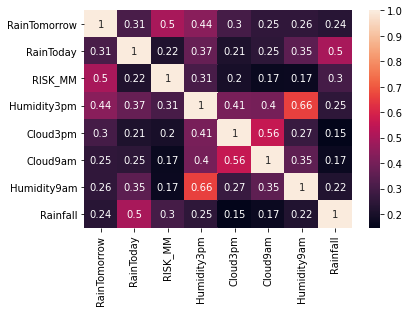

In [56]:
hetmap=sns.heatmap(weather_plus_output[['RainTomorrow','RainToday','RISK_MM','Humidity3pm','Cloud3pm','Cloud9am','Humidity9am','Rainfall']].corr(),annot=True)

In [57]:
col=['Location','year','month','day','RISK_MM','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']
x1=wether_data_real.drop(['Location','year','month','day','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1)

In [58]:
x1.head()

,RISK_MM,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,0.0,13.4,22.9,0.6,71.0,22.0,8.000000,4.503167,0.0
1,0.0,7.4,25.1,0.0,44.0,25.0,4.437189,4.503167,0.0
2,0.0,12.9,25.7,0.0,38.0,30.0,4.437189,2.000000,0.0
3,1.0,9.2,28.0,0.0,45.0,16.0,4.437189,4.503167,0.0
4,0.2,17.5,32.3,1.0,82.0,33.0,7.000000,8.000000,0.0


In [59]:
y.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


# Spliting train test data

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.30, random_state=0)

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# ML_model

In [62]:
kn_classifier=KNeighborsClassifier()

In [63]:
kn_classifier.fit(x_train,y_train)

<ipython-input-63-5d5575abdeb0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kn_classifier.fit(x_train,y_train)


KNeighborsClassifier()

# Prediction

In [64]:
kn_classifier_ypred=kn_classifier.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix

# Checking accuracy

In [66]:
from sklearn.metrics import accuracy_score

In [70]:
kn_classifier_acc=accuracy_score(y_test,kn_classifier_ypred)

print("Accuracy :",round(kn_classifier_acc*100,2))


Accuracy : 92.7


In [71]:
confusion_matrix(y_test,kn_classifier_ypred)

array([[32641,   395],
       [ 2720,  6902]], dtype=int64)

In [72]:
kn_classifier_ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)